In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Type your answer here, replacing this text._

In [3]:
#1. Initial thoughts on problem and dataset. All observations are speculations and Guesswork. 

#----------------------------------------------------------------------------------------------------------

# - On the surface, No categorical/nominal attributes that need OneHotEncoding. May do it for marriage 

# - All Data is some form of numeric already.

# - So far, no features that I wish to drop. 

# - Sex: data is binary. Possibly unimportant? Research shows men carry more overall debt than women.
#        Seems that women are less likely to default than men.    
 
# - Marriage: is Categorical/nominal but data is numeric discreet. 
    #   Single people has a slightly lower default rate than married. Does not affect outcome much.

# - education: could be construed as a Ordinal category but data is already Numeric discreet. 
          # In terms of ratio, Seems the higher education, lower chance to default, 
          # 1 is highest education and 6 is lowest?   

# - Balance Limit: Seems to have an impact on outcome, Data is numeric discreet/continuous 
          # Seems that the higher the balance limit, the lower the chance to default. 

# - Age: Data is Numeric Discreet.  
          # Seems that the higher or lower the age, the lower the chance to default. 
          # Overall, maybe middle age seems to be highest rate to default.   

# - Pay, Bill, Pay_AMT seem to all convey the same/similar information. All Numeric Continuous.
    #   It seems that they have some many categories to correspond to months leading up to now. 
    #   Will probably need to eliminate some (but not all) columns or these will have disproportionate impact. 
    #   Pay, # no explination for how -2 works, assume very good payment. The better the payment, lower chance to default. 
    #   Bill, # seems that the lower the billamt, the lower chance to default? 
    #   Pay_AMT # Seems that the higher the payment, lower chance to default? 

# - Default Payment next month is a binary target. Only binary excluding sex. 
#                    Positive class 1:  Will default, negative class 0 : will not default 



# Document for each attribute below. Taken from Kaggle. 
""" 
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit #Numeric continous 
SEX: Gender (1=male, 2=female) # Binary
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) #Ordinal? Data is Numeric discreet 
MARRIAGE: Marital status (1=married, 2=single, 3=others) #Categorical/Nominal, Data is Numeric Discreet.   
AGE: Age in years #Numeric discreet 
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no) 
"""


cards_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)

cards_df.head() 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split(cards_df, test_size=0.3)

feature_columns = [col for col in train_df.columns if col not in ["default.payment.next.month"]]

<!-- END QUESTION -->

<br><br>

In [5]:
X_train = train_df[feature_columns]
y_train = train_df["default.payment.next.month"]
X_test = test_df[feature_columns]
y_test = test_df["default.payment.next.month"]

#df = pd.DataFrame(y_train.head())
#df 
...

Ellipsis

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

In [6]:
cards_summary = train_df.drop(columns=["default.payment.next.month"]).describe() 

cards_summary #No missing data, can drop sex
# Indicates that all features are numerical

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167215.809524,1.602143,1.853857,1.55400,35.451000,-0.017524,-0.131333,-0.167619,-0.218143,-0.266619,...,4.683718e+04,43127.783429,40255.641286,38915.284524,5638.834190,5.949473e+03,5218.766000,4903.980571,4846.606429,5135.557048
std,129161.237104,0.489467,0.788341,0.52131,9.197598,1.127974,1.197879,1.195018,1.173904,1.135268,...,6.911641e+04,63815.804327,60189.955737,59253.283980,16860.606271,2.478941e+04,17042.369241,16161.223415,15281.951434,17211.223410
min,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.691000e+03,2358.750000,1791.750000,1294.250000,1000.000000,8.390000e+02,390.000000,307.000000,264.000000,100.000000
50%,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000450e+04,19000.000000,18028.500000,17037.500000,2106.500000,2.012000e+03,1812.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.974550e+04,54472.000000,50186.750000,49279.500000,5006.000000,5.000000e+03,4533.000000,4070.250000,4100.250000,4000.250000
max,800000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,1.664089e+06,628699.000000,551702.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,388071.000000,527143.000000


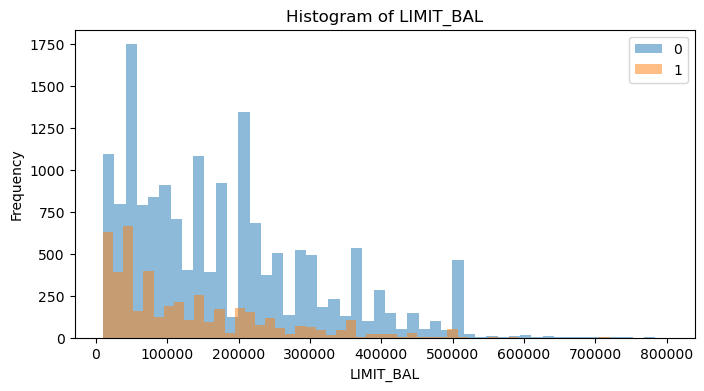

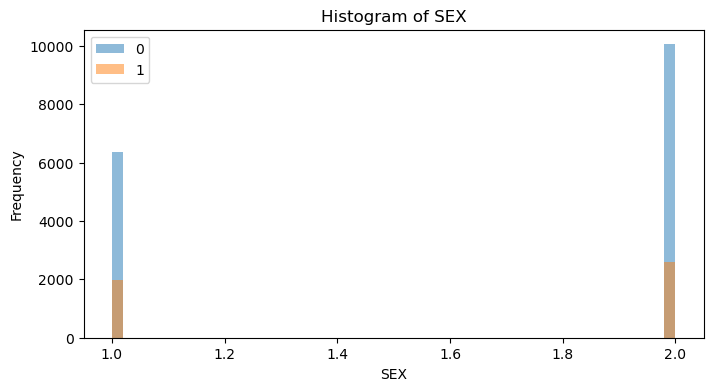

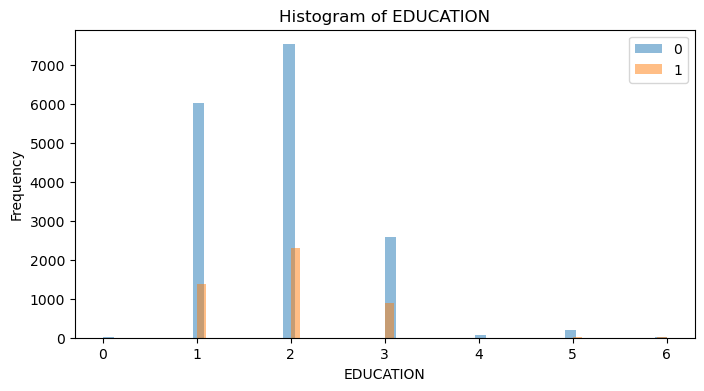

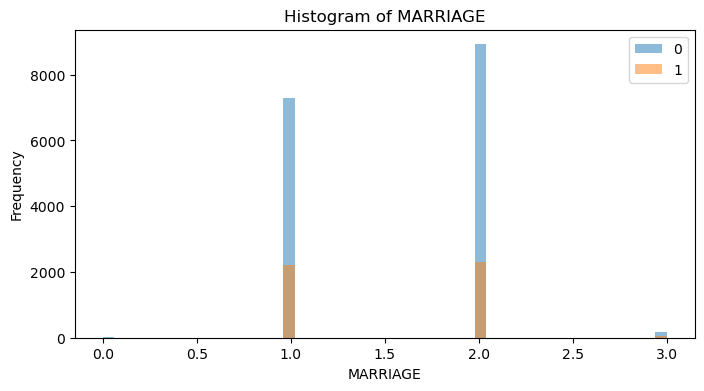

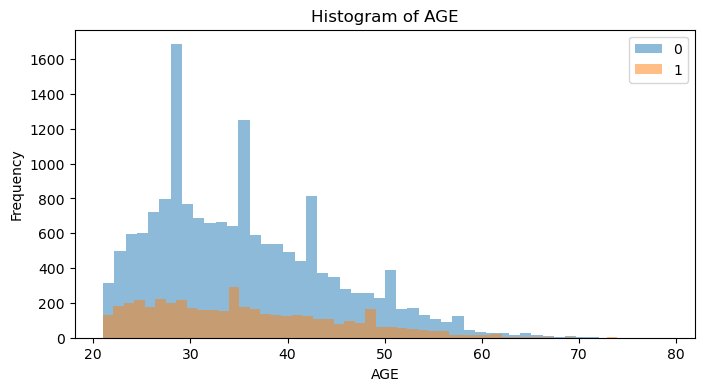

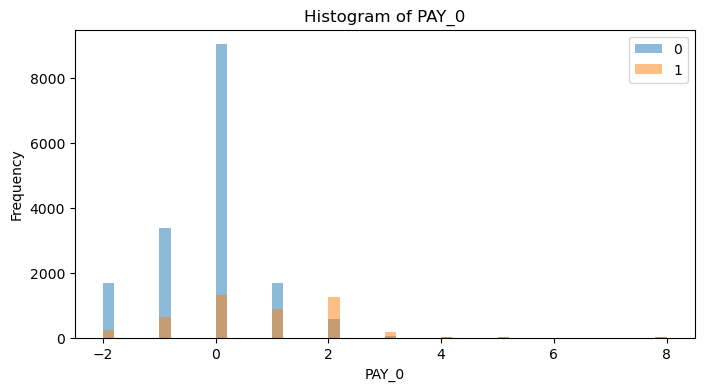

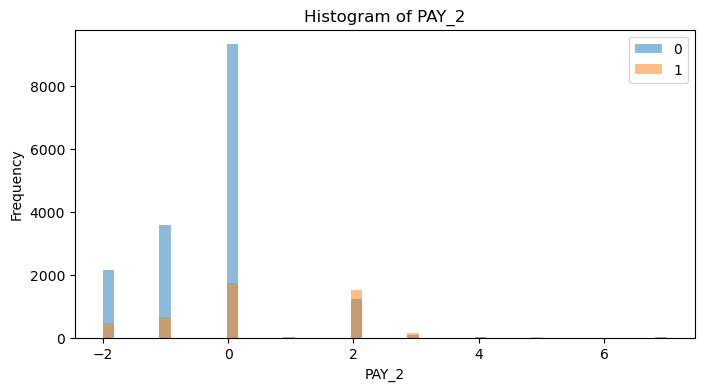

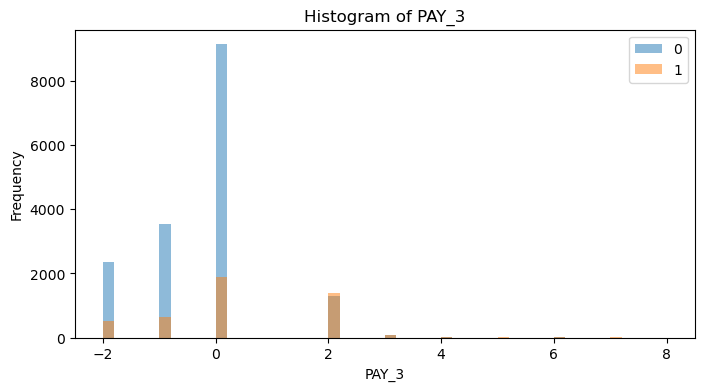

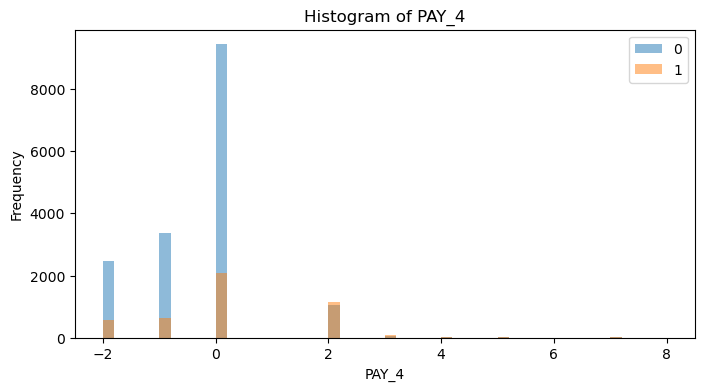

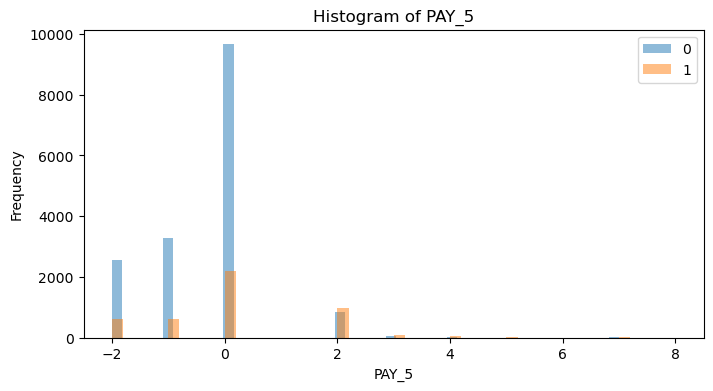

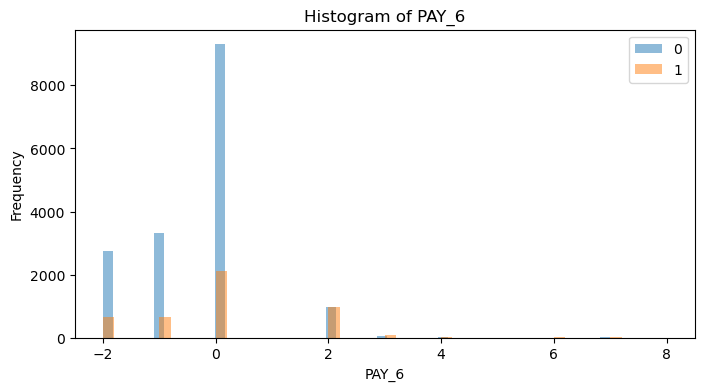

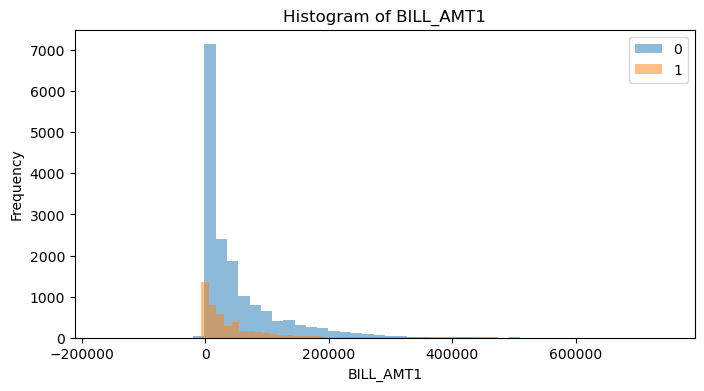

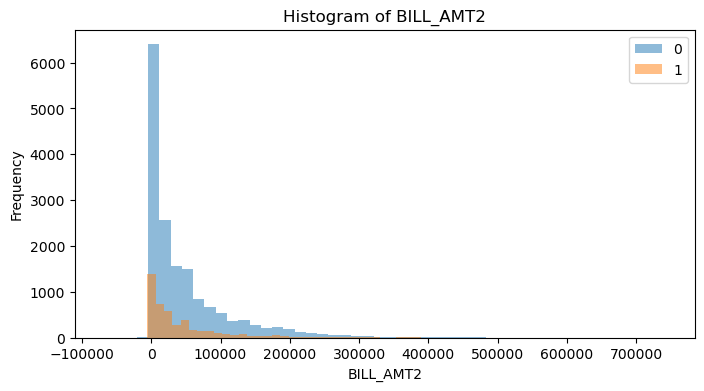

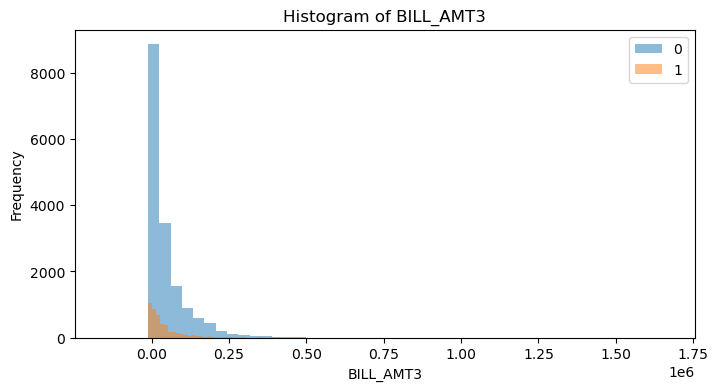

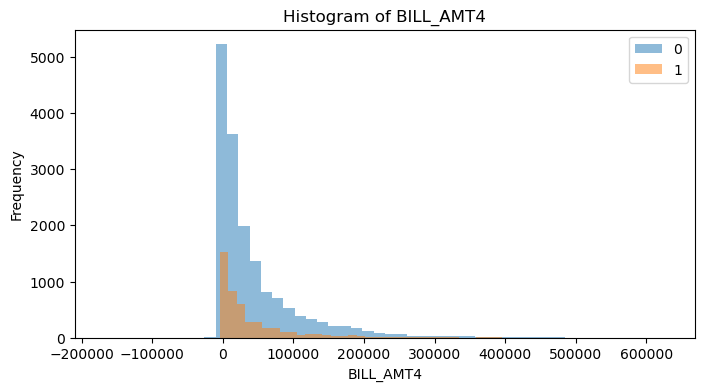

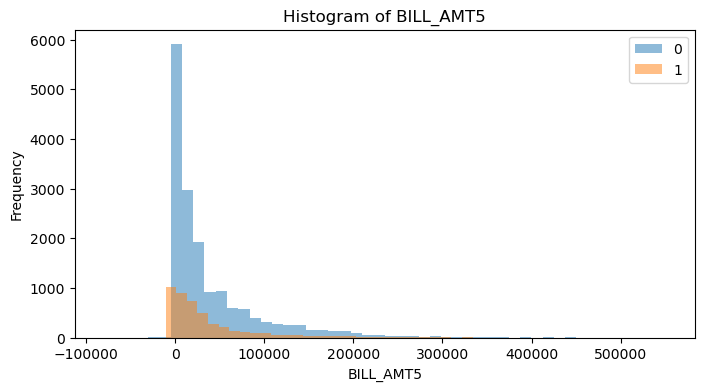

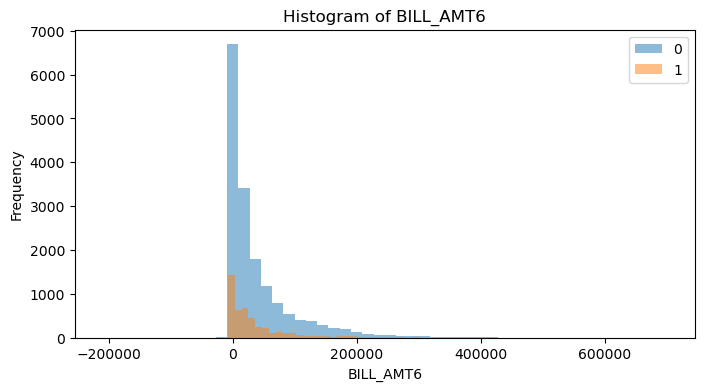

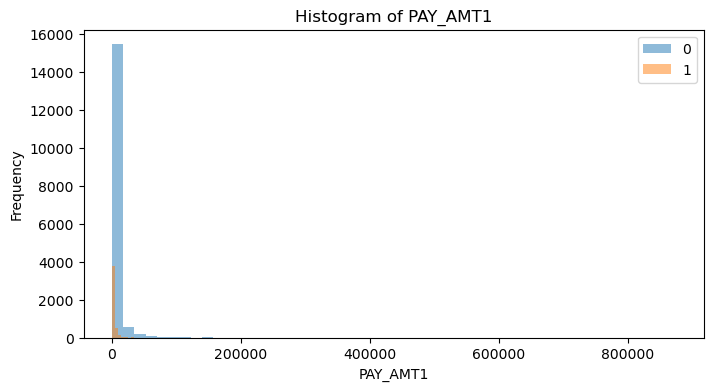

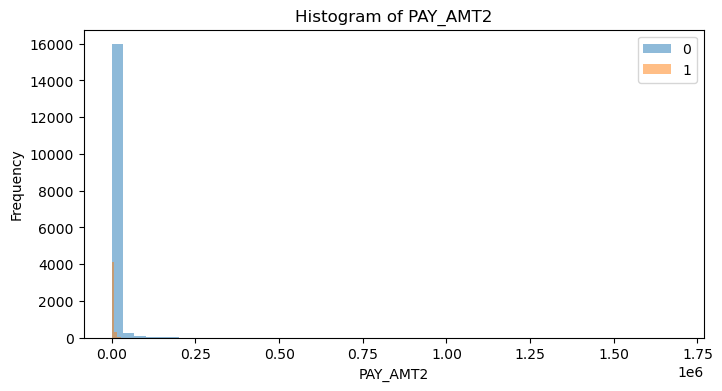

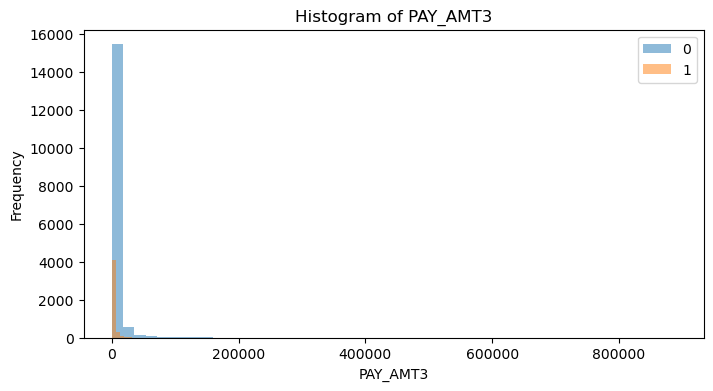

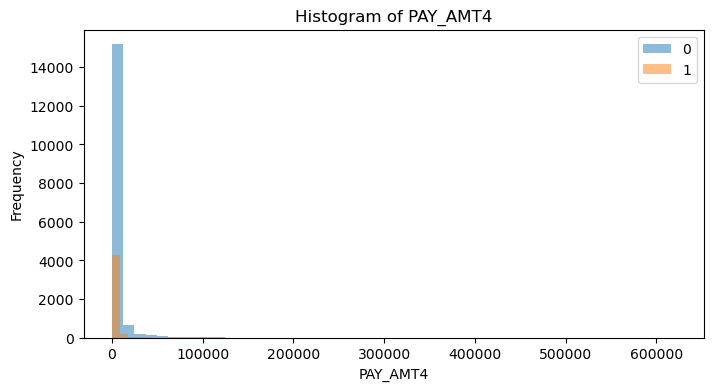

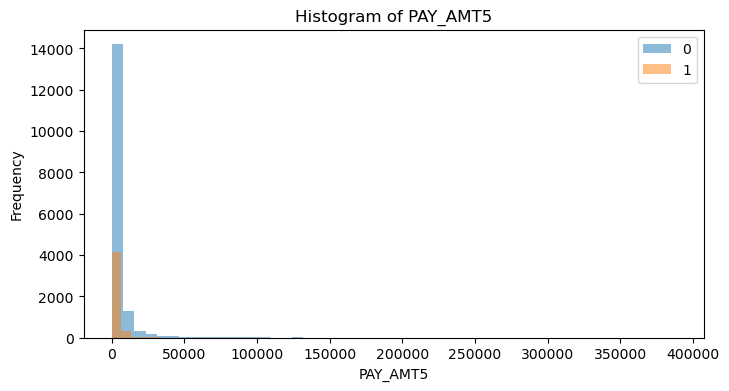

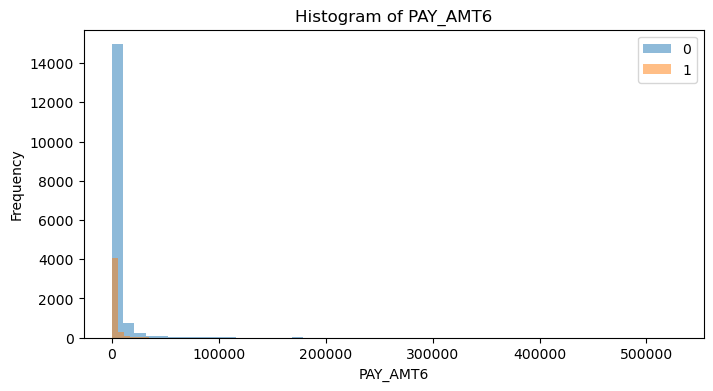

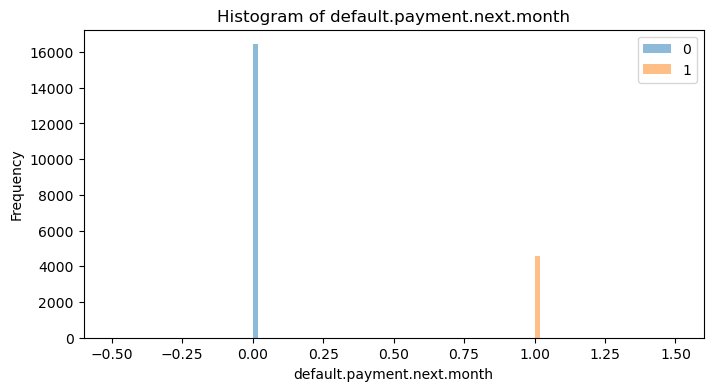

In [7]:
#beatures = train_df.drop(columns = ["SEX"]).columns  if sex is unimportant, otherwise...

beatures = train_df.columns 

for beat in beatures:
    plt.figure(figsize=(8,4))
    bx = train_df.groupby("default.payment.next.month")[beat].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(beat)
    plt.title("Histogram of " + beat)
    plt.show()



In [8]:
beatures 

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
...

Ellipsis

In [10]:
...

Ellipsis

In [11]:
...

Ellipsis

In [12]:
...

Ellipsis

In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

In [15]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [16]:
#We can combine PAY_0 to PAY_5, BILL_AMT1 to BILL_AMT5 and PAY_AMT1 to PAY_AMT5 into a new dataframe. No reason to have so many columns. 

# we keep the latest cycle "e.g PAY_6" because it is the most recent. 

brain_df = cards_df.copy()   #Brain is a inplace variable to see if the code works 

brain_df['average_pay'] = brain_df[['PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5']].mean(axis=1)  

brain_df = brain_df.drop(columns=['PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5'],axis=1, inplace=False )

brain_df['average_billamt'] = brain_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5']].mean(axis=1) 

brain_df = brain_df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5'],axis=1, inplace=False )

brain_df['average_payamt'] =  brain_df[['PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']].mean(axis=1)

brain_df = brain_df.drop(columns=['PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5'],axis=1, inplace=False )

cols_a = list(brain_df.columns)

print(cols_a) # prints the columns 
# print(brain_df['average_pay']) No Average Pay yet Need mess around with inplace to fix the bug. 

cols_a.insert(5, cols_a.pop(cols_a.index('average_pay')))
cols_a.insert(7, cols_a.pop(cols_a.index('average_billamt')))
cols_a.insert(9, cols_a.pop(cols_a.index('average_payamt'))) #inserts new columns into the correct positions. 

brain_df = brain_df.loc[:, cols_a]

brain_df.head() 

# The above code is proven to work. We just need to resign train, test, X and Y. 

train_df, test_df = train_test_split(brain_df, test_size=0.4, random_state=123) #Shuffles data 

feature_columns = [col for col in train_df.columns if col not in ["default.payment.next.month"]]

X_train = train_df[feature_columns]
y_train = train_df["default.payment.next.month"]
X_test = test_df[feature_columns]
y_test = test_df["default.payment.next.month"]

# Reassigned 

# Other factors like debt-to-income ratio and Credit Score can lead to default. 
# No idea where to find that data, as that data is not present. 

X_train.head() # Works

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6', 'default.payment.next.month', 'average_pay', 'average_billamt', 'average_payamt']


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,average_pay,PAY_6,average_billamt,BILL_AMT6,average_payamt,PAY_AMT6
ID,,,,,,,,,,,
9778,300000.0,2,2,2,42,-0.6,-2,10192.0,0.0,2603.2,7000.0
17337,300000.0,2,2,1,36,-0.2,0,14005.2,12144.0,3100.0,1000.0
91,200000.0,1,1,1,53,2.0,2,142527.2,149531.0,5560.0,5000.0
10004,50000.0,1,1,2,39,0.0,0,34795.0,16412.0,1951.4,2000.0
11695,160000.0,2,2,1,32,-0.6,0,858.0,390.0,390.0,390.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [17]:
# Numeric Features
    # Discreet : AGE
    # Continous : average_pay, PAY_6, average_billamt, BILL_AMT6, average_payamt, PAY_AMT6, LIMIT_bAL

# Ordinal Features : EDUCATION "but already numeric discreet"  

# Categorical/NOMINAL Features : MARRIAGE "but already numeric discreet, may need to oneHotEncode this". 

# Binary Features : SEX 


# Drop Features : NONE,  


#Adapted from lecture 6 


numeric_feats = [
    "LIMIT_BAL",
    "AGE",
    "PAY_6",
    "average_pay",
    "BILL_AMT6",
    "average_billamt",
    "PAY_AMT6",
    "average_payamt",
    "EDUCATION"
]  # apply scaling

categorical_feats = ["MARRIAGE"]  # apply one-hot encoding
ordinal_feats = []  # apply ordinal encoding
binary_feats = ["SEX"]  # apply one-hot encoding with drop="if_binary"  # <-- here
passthrough_feats = []  # do not apply any transformation
drop_feats = []
EDUCATION_levels = [1,2,3,4,5,6]

ct = make_column_transformer(
    (OrdinalEncoder(categories=[EDUCATION_levels]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    (OneHotEncoder(), categorical_feats),
    (StandardScaler(), numeric_feats),
)


In [18]:
ct

ColumnTransformer(transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[[1, 2, 3, 4, 5,
                                                             6]]),
                                 []),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['SEX']),
                                ('onehotencoder-2', OneHotEncoder(),
                                 ['MARRIAGE']),
                                ('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'PAY_6', 'average_pay',
                                  'BILL_AMT6', 'average_billamt', 'PAY_AMT6',
                                  'average_payamt', 'EDUCATION'])])

In [19]:
# From hw3

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [20]:
dummy = DummyClassifier() # Create a classifier object

In [21]:
cross_val_score(dummy, X_train, y_train)

array([0.7775, 0.7775, 0.7775, 0.7775, 0.7775])

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

In [22]:
results = {}

# Scoring metric of accuracy is being used due to the imbalanced nature of the dataset
scoring_metric = "accuracy"

X_train_transformed = ct.fit_transform(X_train)

column_names = (
    numeric_feats
    + ct.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
    + ct.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
)

lr_pipe = make_pipeline(ct, LogisticRegression())

results["log_reg"] = mean_std_cross_val_scores(
    lr_pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [23]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
log_reg,0.070 (+/- 0.015),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)


In [24]:
#Adapted from lecture 7,8 

scores_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "train_scores_std" : list(),
    "mean_cv_scores": list(),
    "cv_scores_std": list() 
}


for C in scores_dict["C"]:
    pipe_lr = make_pipeline(ct, LogisticRegression(C=C))
    scores = cross_validate(pipe_lr, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["train_scores_std"].append(scores["train_score"].std())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
    scores_dict["cv_scores_std"].append(scores["test_score"].std())

results_df_7 = pd.DataFrame(scores_dict)

results_df_7  
 
# It seems that the C of 100 has the best generalization as the train_scores and the cv_scores are relatively close so the
# the model being overfitted is unlikely. Moreover, if C goes over 100 both the cv_scores and the train_scores flattens out.


,C,mean_train_scores,train_scores_std,mean_cv_scores,cv_scores_std
0,0.0001,0.777625,0.000052,0.777556,0.000111
1,0.0010,0.788444,0.000991,0.787611,0.002295
2,0.0100,0.799125,0.001083,0.799167,0.003821
3,0.1000,0.800264,0.000948,0.800333,0.004046
4,1.0000,0.800611,0.000754,0.800556,0.003901
5,10.0000,0.800597,0.000813,0.800611,0.003957
6,100.0000,0.800597,0.000813,0.800667,0.003954
7,1000.0000,0.800597,0.000813,0.800667,0.003954
8,10000.0000,0.800597,0.000813,0.800667,0.003954
9,100000.0000,0.800597,0.000813,0.800667,0.003954


In [25]:
best_lr = make_pipeline(ct, LogisticRegression(C=100))


results["opt_log_reg"] = mean_std_cross_val_scores(
    best_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [26]:
pd.DataFrame(results).T # Seems the default C value for logistic regression is 100.

,fit_time,score_time,test_score,train_score
log_reg,0.070 (+/- 0.015),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
opt_log_reg,0.047 (+/- 0.002),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

In [27]:
# Adapted from Lecture 11

pipe_rf = make_pipeline(
    #ct, RandomForestClassifier(max_depth=2, n_estimators=3, random_state=123)
    ct, RandomForestClassifier(random_state=123) 
)

results["random_forest"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [28]:
from sklearn.neighbors import KNeighborsClassifier


pipe_knn = make_pipeline(
    ct, KNeighborsClassifier()
)

results["knn"] = mean_std_cross_val_scores(
    pipe_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [29]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline(ct, DecisionTreeClassifier())

results["decision_tree"] = mean_std_cross_val_scores(
    pipe_dt, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [30]:
pd.DataFrame(results).T 

,fit_time,score_time,test_score,train_score
log_reg,0.070 (+/- 0.015),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
opt_log_reg,0.047 (+/- 0.002),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
random_forest,1.748 (+/- 0.022),0.070 (+/- 0.001),0.801 (+/- 0.004),0.999 (+/- 0.000)
knn,0.025 (+/- 0.005),0.465 (+/- 0.026),0.783 (+/- 0.004),0.837 (+/- 0.002)
decision_tree,0.115 (+/- 0.007),0.007 (+/- 0.001),0.714 (+/- 0.012),0.999 (+/- 0.000)


It is apparent that the default model of knn and decision tree classifier perform worse than the optimized version of the linear model. Moreover, random_forest minutely score better than the linear model but the train_score is quite high that it has been overfitted and will not generalize well. The same goes for decision tree model. Knn however is not overfitted. In terms of score time, knn takes the longest time but the fastest for fit time which is as expected as it has to compute distances to predict new data.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

In [34]:
#Adapted from lecture 12 

# Model 1 :: Tree based ensemble model. 

param_grid_random_forest = {
    "randomforestclassifier__n_estimators": [10, 50, 100, 200],
    "randomforestclassifier__max_depth": [10, 15, 20, 25, 30],
}

random_search = RandomizedSearchCV(
    pipe_rf, param_distributions=param_grid_random_forest, n_jobs=-5, n_iter=20, cv=5, random_state=123
)

random_search.fit(X_train,y_train) 

print("best score: ", random_search.best_score_)
print("best params: ", random_search.best_params_)

best score:  0.8070555555555556
best params:  {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__max_depth': 10}


In [35]:
results_rf = pd.DataFrame(random_search.cv_results_).set_index("rank_test_score").sort_index()
results_rf.T
best_rf = make_pipeline(ct, RandomForestClassifier(max_depth=10, n_estimators=200, random_state=123))

results["opt_random_forest"] = mean_std_cross_val_scores(
    best_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [36]:
param_grid_knn = {
     'kneighborsclassifier__n_neighbors': list(range(1, 21)),  
    
}

grid_search = GridSearchCV(
    pipe_knn, param_grid_knn, cv=5, n_jobs=-5, return_train_score=True
)

grid_search.fit(X_train,y_train) 

print("best score: ", grid_search.best_score_)
print("best params: ", grid_search.best_params_)

best score:  0.8037222222222222
best params:  {'kneighborsclassifier__n_neighbors': 19}


In [37]:
results_knn = pd.DataFrame(grid_search.cv_results_).set_index("rank_test_score").sort_index()
results_knn.T

best_knn = make_pipeline(ct, KNeighborsClassifier(n_neighbors=19))

results["opt_knn"] = mean_std_cross_val_scores(
    best_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [38]:
param_grid_dt = {
     'decisiontreeclassifier__max_depth': list(range(1, 15)),  
    
}

grid_search = GridSearchCV(
    pipe_dt, param_grid_dt, cv=5, n_jobs=-5, return_train_score=True
)

grid_search.fit(X_train,y_train) 

print("best score: ", grid_search.best_score_)
print("best params: ", grid_search.best_params_)

best score:  0.8101666666666667
best params:  {'decisiontreeclassifier__max_depth': 3}


In [39]:
results_dt = pd.DataFrame(grid_search.cv_results_).set_index("rank_test_score").sort_index()
results_dt.T

best_dt = make_pipeline(ct, DecisionTreeClassifier(max_depth=3))

results["opt_decision_tree"] = mean_std_cross_val_scores(
    best_dt, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [40]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
log_reg,0.070 (+/- 0.015),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
opt_log_reg,0.047 (+/- 0.002),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
random_forest,1.748 (+/- 0.022),0.070 (+/- 0.001),0.801 (+/- 0.004),0.999 (+/- 0.000)
knn,0.025 (+/- 0.005),0.465 (+/- 0.026),0.783 (+/- 0.004),0.837 (+/- 0.002)
decision_tree,0.115 (+/- 0.007),0.007 (+/- 0.001),0.714 (+/- 0.012),0.999 (+/- 0.000)
opt_random_forest,2.410 (+/- 0.080),0.090 (+/- 0.003),0.807 (+/- 0.003),0.853 (+/- 0.001)
opt_knn,0.026 (+/- 0.010),0.600 (+/- 0.088),0.804 (+/- 0.004),0.813 (+/- 0.001)
opt_decision_tree,0.036 (+/- 0.003),0.008 (+/- 0.002),0.810 (+/- 0.004),0.810 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Type your answer here, replacing this text._

In [41]:
best_rf.fit(X_train, y_train)

ohe_feature_names = (
    best_rf.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-2"]
    .get_feature_names_out(categorical_feats)
    .tolist()
)
feature_names = (
    ordinal_feats + binary_feats + ohe_feature_names + numeric_feats
)

data = {
    "Importance": best_rf.named_steps["randomforestclassifier"].feature_importances_,
}
rf_imp_df = pd.DataFrame(
    data=data,
    index=feature_names,
).sort_values(by="Importance", ascending=False)

In [42]:
rf_imp_df

,Importance
average_pay,0.394914
PAY_6,0.108610
average_payamt,0.108471
average_billamt,0.090673
BILL_AMT6,0.071659
LIMIT_BAL,0.068115
PAY_AMT6,0.058059
AGE,0.055124
EDUCATION,0.017793
SEX,0.009883


In [43]:
import eli5
from eli5.formatters import format_html_styles

eli5_rf = eli5.show_weights(
    best_rf.named_steps["randomforestclassifier"], feature_names=feature_names, 
)

eli5_rf

Weight,Feature
0.3949 ± 0.2216,average_pay
0.1086 ± 0.1660,PAY_6
0.1085 ± 0.0664,average_payamt
0.0907 ± 0.0375,average_billamt
0.0717 ± 0.0336,BILL_AMT6
0.0681 ± 0.0513,LIMIT_BAL
0.0581 ± 0.0354,PAY_AMT6
0.0551 ± 0.0202,AGE
0.0178 ± 0.0098,EDUCATION
0.0099 ± 0.0071,SEX


The most important feature is average_pay with an importance score of 0.394914. This suggests that PAY_0 to PAY_5 features is the most significant predictor of the target.

PAY_6 also has a strong influence on predicting default payment.

average_billamt and BILL_AMT6 is also relatively important although slightly lower than PAY_6 and average_payamt.

The credit limit, age, education, gender, and marital status have some influence but to a lesser extent.

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

In [47]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
log_reg,0.070 (+/- 0.015),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
opt_log_reg,0.047 (+/- 0.002),0.007 (+/- 0.001),0.801 (+/- 0.004),0.801 (+/- 0.001)
random_forest,1.748 (+/- 0.022),0.070 (+/- 0.001),0.801 (+/- 0.004),0.999 (+/- 0.000)
knn,0.025 (+/- 0.005),0.465 (+/- 0.026),0.783 (+/- 0.004),0.837 (+/- 0.002)
decision_tree,0.115 (+/- 0.007),0.007 (+/- 0.001),0.714 (+/- 0.012),0.999 (+/- 0.000)
opt_random_forest,2.410 (+/- 0.080),0.090 (+/- 0.003),0.807 (+/- 0.003),0.853 (+/- 0.001)
opt_knn,0.026 (+/- 0.010),0.600 (+/- 0.088),0.804 (+/- 0.004),0.813 (+/- 0.001)
opt_decision_tree,0.036 (+/- 0.003),0.008 (+/- 0.002),0.810 (+/- 0.004),0.810 (+/- 0.001)


In [48]:
# Oddly enough, the best performing model is the decision tree model with max depth of 3. 
best_dt.fit(X_train, y_train)
best_dt.score(X_test, y_test)

0.8013333333333333

The test score is quite close to the validation scores. I would not trust the results too much as the train_score and final test_score are around 80% but at the same time, the validation_score and test_score are not very different so I do not think there is any optimization bias.

In [ ]:
import shap

X_train_enc = pd.DataFrame(
    data=ct.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_test_enc = pd.DataFrame(
    data=ct.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

rf_explainer = shap.TreeExplainer(best_rf.named_steps["randomforestclassifier"])

train_rf_shap_values = rf_explainer.shap_values(X_train_enc)
test_rf_shap_values = rf_explainer.shap_values(X_test_enc)

/Users/sittpaing/miniconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/sittpaing/miniconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def

In [ ]:
y_test_reset = y_test.reset_index(drop=True)
default = y_test_reset[y_test_reset == 1].index.tolist()
no_default = y_test_reset[y_test_reset == 0].index.tolist()

ex_default = default[10]
ex_no_default = no_default[10]

shap.force_plot(
    rf_explainer.expected_value[1],
    test_rf_shap_values[1][ex_default, :],
    X_test_enc.iloc[ex_default, :],
    matplotlib=True,
)

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

In [ ]:
pd.DataFrame(results).T

To conclude, he optimized versions of the logistic regression; the optimized version is the base version, random forest, KNN, and decision tree models do not show significant improvements in performance compared to their base versions. This shows that the optimization techniques applied have not yielded substantial benefits in this dataset.


Ideas that I could try:

Ensemble methods from lecture 11 such as combining multiple models and voting or stacking ensemble to leverage the strengths of different algorithms.

Advanced techniques: Explore more advanced machine learning techniques, such as gradient boosting algorithms such as XGBoost and LightGBM. They might offer improvement relative to the random forest or decision tree. 

Feature selection from lecture 12 such as RFE algorithm or forward/backward search. This would have eliminated less relevant features that may improve the fit time for the models above or predict time for knn. They may also enhance the score of random forest as models can be trained with a larger set of important features.


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)